<a href="https://colab.research.google.com/github/majavier26/DSProjects/blob/main/Baybayin%20OCR/Centering_binary_images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import skimage as ski
import cv2

Let's make a function that generates a circle with a center `(x0, y0)` and radius `rad` given a meshgrid `X` and `Y`..

In [ ]:
def generateCircle(xi, yi, x0, y0, rad):
    condlist = [np.sqrt((xi-x0)**2 + (yi-y0)**2) <= rad, np.sqrt((xi-x0)**2 + (yi-y0)**2) > rad]
    choicelist = [1, 0]
    return np.select(condlist, choicelist)

In [ ]:
# Making the meshgrid
line = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(line, line)

(-5.0, 5.0)

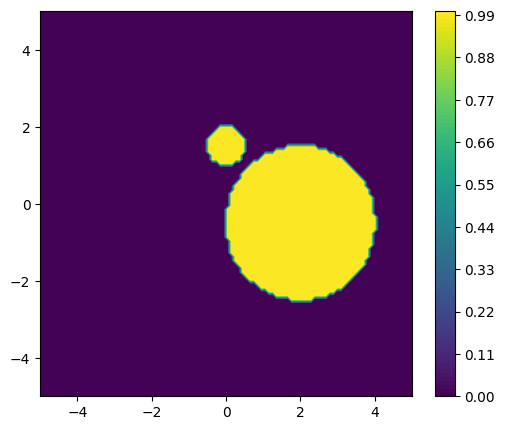

In [ ]:
# Generating an asymmetrical binary image
circle1 = generateCircle(X, Y, 2, -0.5, 2)
circle2 = generateCircle(X, Y, 0, 1.5, 0.5)
circles = circle1 + circle2

plt.figure(figsize=(6, 5))
plt.contourf(X, Y, circles, 100)
plt.colorbar()
plt.xlim(-5, 5)
plt.ylim(-5, 5)

In [ ]:
threshold_value = ski.filters.threshold_otsu(circles)
labeled_foreground = (circles > threshold_value).astype(int)

In [ ]:
properties = ski.measure.regionprops(labeled_foreground, circles)
com = properties[0].centroid
com_int = np.round(com).astype(int)

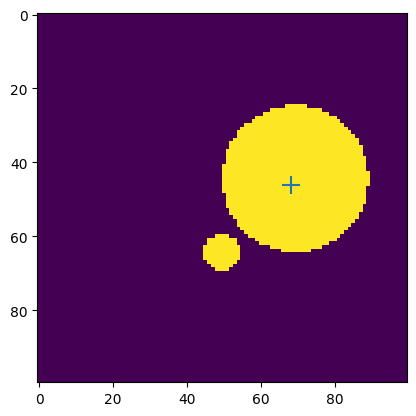

In [ ]:
plt.imshow(circles)
plt.scatter(com_int[1], com_int[0], s=160, marker="+")

In [ ]:
def getCentroid(image):
    threshold_value = ski.filters.threshold_otsu(image)
    labeled_foreground = (image > threshold_value).astype(int)
    properties = ski.measure.regionprops(labeled_foreground, image)
    # Skimage returns (y, x) as the COM, not (x, y)
    y, x = properties[0].centroid

    return x, y

In [ ]:
def translateBinaryShape(image, x_shift, y_shift):
  height, width = image.shape
  translation_matrix = np.float32([[1, 0, x_shift], [0, 1, y_shift]])
  translated_image = cv2.warpAffine(image, translation_matrix, (width, height), borderValue=0)

  return translated_image

Let's make an image with a square and translate it.

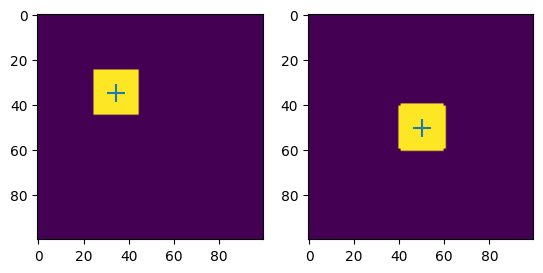

In [ ]:
# Square square
square = np.zeros((100, 100), dtype=np.uint8)
square[25:45, 25:45] = 1  # Create a 20x20 square

# Center of mass
square_com_x, square_com_y = getCentroid(square)
square_center_x, square_center_y = square.shape[0]/2, square.shape[1]/2
square_shift_x, square_shift_y = square_center_x - square_com_x, square_center_y - square_com_y

# Plotting
plt.subplot(121)
plt.imshow(square)
plt.scatter(square_com_x, square_com_y, s=160, marker="+")
plt.subplot(122)
plt.imshow(translateBinaryShape(square, square_shift_x, square_shift_y))
plt.scatter(square_center_x, square_center_y, s=160, marker="+")

In [ ]:
def compareCenteredImage(image):
  # Center of mass
  image = image.astype(np.uint8)
  height, width = image.shape
  image_com_x, image_com_y = getCentroid(image)
  image_center_x, image_center_y = image.shape[0]/2, image.shape[1]/2
  image_shift_x, image_shift_y = image_center_x - image_com_x, image_center_y - image_com_y

  # Translate shape
  translation_matrix = np.float32([[1, 0, image_shift_x], [0, 1, image_shift_y]])
  translated_image = cv2.warpAffine(image, translation_matrix, (width, height), borderValue=0)

  # Plotting
  ## Original image
  plt.subplot(131)
  plt.imshow(image)
  plt.scatter(image_com_y, image_com_x, s=160, marker="+")
  plt.title(f"Original image\n COM=({np.round(image_com_x, 2)}, {np.round(image_com_y, 2)})")
  ## Translated image
  plt.subplot(132)
  plt.imshow(translateBinaryShape(image, image_shift_x, image_shift_y))
  plt.scatter(image_center_y, image_center_x, s=160, marker="+")
  plt.title(f"Translated image\n Shift=({np.round(image_shift_x, 2)}, {np.round(image_shift_x, 2)})")
  ## Negative Translated image
  plt.subplot(133)
  plt.imshow(translateBinaryShape(image, -image_shift_x, -image_shift_y))
  plt.scatter(image_center_y, image_center_x, s=160, marker="+")
  plt.title(f"Translated image (neg)\n Shift=({-1*np.round(image_shift_x, 2)}, {-1*np.round(image_shift_x, 2)})")

  return None

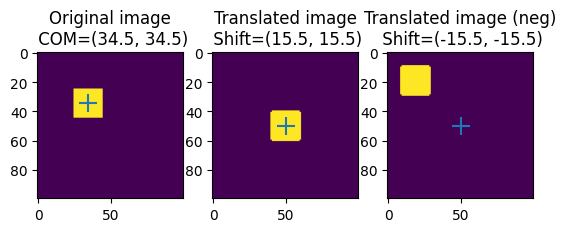

In [ ]:
compareCenteredImage(square)

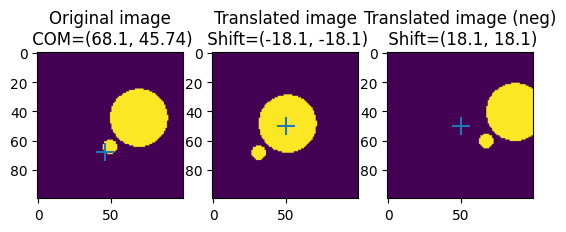

In [ ]:
compareCenteredImage(circles)

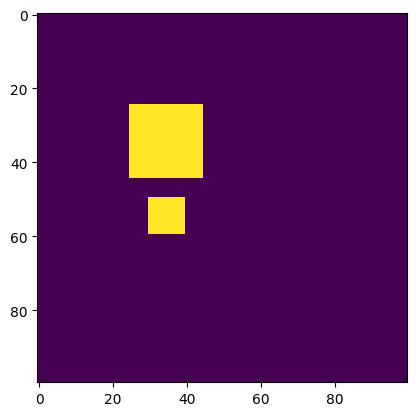

In [ ]:
# Square square
squares = np.zeros((100, 100), dtype=np.uint8)
squares[25:45, 25:45] = 1  # Create a 20x20 square
squares[50:60, 30:40] = 1

plt.imshow(squares)

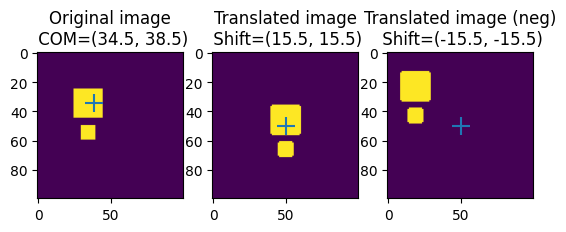

In [ ]:
compareCenteredImage(squares)

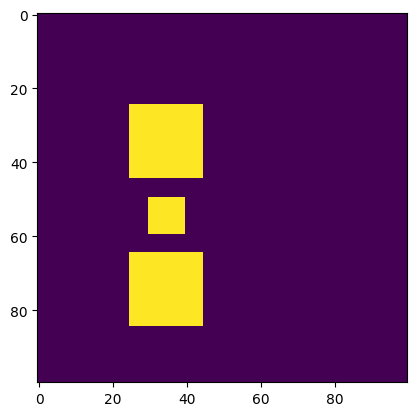

In [ ]:
# Square square
squares1 = np.zeros((100, 100), dtype=np.uint8)
squares1[25:45, 25:45] = 1  # Create a 20x20 square
squares1[50:60, 30:40] = 1
squares1[65:85, 25:45] = 1

plt.imshow(squares1)

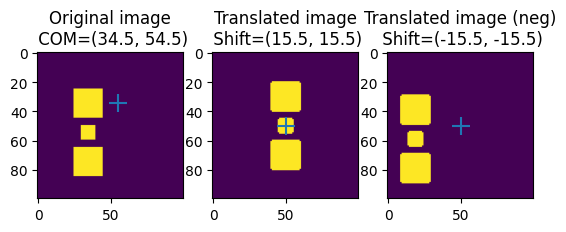

In [ ]:
compareCenteredImage(squares1)

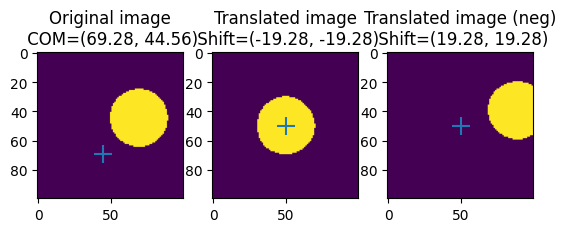

In [ ]:
compareCenteredImage(circle1)

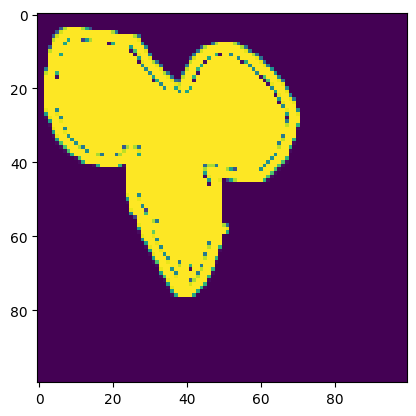

In [ ]:
tite_image = cv2.imread('tite.png', cv2.IMREAD_GRAYSCALE)
plt.imshow(tite_image)

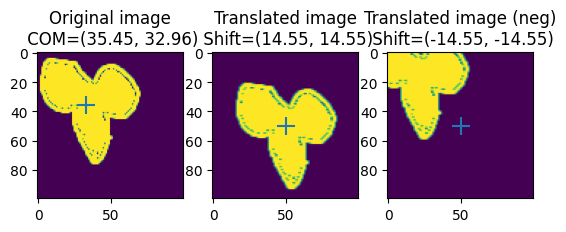

In [ ]:
compareCenteredImage(tite_image)